<a href="https://colab.research.google.com/github/mirinai/python_prac/blob/main/20th_data_analysis0408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:


# 1.2) 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기


### [Chipotle 데이터셋의 기본 정보]

# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
#file_path = '../data/chipotle.tsv'
file_path = './chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
print("chiop :")
print(chipo)
print("------------------------------------")
print("chipo.shape :")
print(chipo.shape)
print("------------------------------------")
print("chipo.info() :")
print(chipo.info())
print("------------------------------------")


### [Chipotle 데이터셋의 행과 열, 데이터]




print("------------------------------------")
print(chipo.columns)
print("------------------------------------")
print(chipo.index)
print("------------------------------------")
chipo.head(5)

chiop :
      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Cleme

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [71]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [56]:
print("chipo.column =",chipo.columns)


chipo.column = Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [72]:
print("chipo.index =",chipo.index)

chipo.index = RangeIndex(start=0, stop=4622, step=1)


In [58]:
chipo["order_id"]=chipo['order_id'].astype(str)


In [59]:
print("chipo.describe()=")#요약통계
print(chipo.describe())#order_id는 string으로 바꿔서 뺌
'''
25%       1.000000
50%       1.000000
75%       1.000000
 : box plot
'''



chipo.describe()=
          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


'\n25%       1.000000\n50%       1.000000\n75%       1.000000\n : box plot\n'

In [73]:
print(len(chipo['order_id'].unique()))#겹치는 걸 하나로 다룸


1834


In [61]:
print(len(chipo['item_name'].unique()))#메뉴의 수

50


In [74]:
item_count = chipo['item_name'].value_counts()[ : 10]
print(type(chipo['item_name'].value_counts()))
print("----------------------------------------")
#print("item_count = "item_count)
for idx, (var, cnt) in enumerate(item_count.items(), 0):
    print("Top", idx, ":", var,"|", cnt)

<class 'pandas.core.series.Series'>
----------------------------------------
Top 0 : Chicken Bowl | 726
Top 1 : Chicken Burrito | 553
Top 2 : Chips and Guacamole | 479
Top 3 : Steak Burrito | 368
Top 4 : Canned Soft Drink | 301
Top 5 : Steak Bowl | 211
Top 6 : Chips | 211
Top 7 : Bottled Water | 162
Top 8 : Chicken Soft Tacos | 115
Top 9 : Chips and Fresh Tomato Salsa | 110


In [75]:
chipo["item_name"].value_counts().index.tolist()[0]

'Chicken Bowl'

In [64]:
#메뉴마다 order_count
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:len(order_count)]

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [65]:
item_quantity = chipo.groupby("item_name")['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

order_cnt= [55, 66, 91, 12, 10, 25, 211, 4, 6, 126, 351, 71, 60, 8, 1, 6, 40, 761, 591, 50, 9, 123, 120, 230, 130, 506, 1, 23, 18, 45, 50, 33, 25, 2, 20, 29, 2, 110, 221, 386, 36, 4, 31, 56, 87, 97, 1, 6, 18, 8]
len(order_cnt)= 50


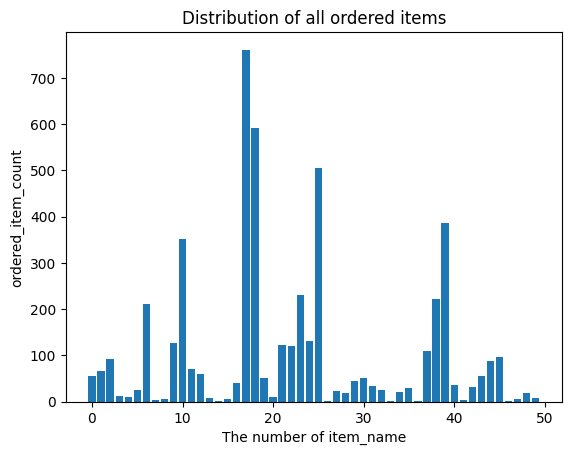

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list=item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
print("order_cnt=",order_cnt)
print("len(order_cnt)=",len(order_cnt))
plt.bar(x_pos,order_cnt, align='center')
plt.ylabel("ordered_item_count")
plt.xlabel("The number of item_name")
plt.title("Distribution of all ordered items")
plt.show()


In [76]:
print("chipo.info()=")
print(chipo.info())
print("-----------------------------------------------------------")
print("chipo['item_price'] : ")
print(chipo['item_price'])

chipo.info()=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
-----------------------------------------------------------
chipo['item_price'] : 
0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object


In [79]:
item_price_without_units=chipo['item_price'].apply(lambda x : float(x[1:]))
print("item_price_without_units :")
print(item_price_without_units.head(10))
#print(chipo['item_price'].head(10))

print("-------------------------------------")
chipo.describe()

item_price_without_units :
0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
5    10.98
6     1.69
7    11.75
8     9.25
9     9.25
Name: item_price, dtype: float64
-------------------------------------


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [81]:
chipo['item_price']=chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [86]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [90]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price>=10]
print("chipo_orderid_group.item_price>=10")
print("results[:10]:")
print()
print(results[:10])
print("----------------------------")
print("results.index.values :")
print(results.index.values)

chipo_orderid_group.item_price>=10
results[:10]:

          quantity                                          item_name  \
order_id                                                                
1                4  Chips and Fresh Tomato SalsaIzzeNantucket Nect...   
2                2                                       Chicken Bowl   
3                2                          Chicken BowlSide of Chips   
4                2                      Steak BurritoSteak Soft Tacos   
5                2                   Steak BurritoChips and Guacamole   
6                2             Chicken Crispy TacosChicken Soft Tacos   
7                2                    Chicken BowlChips and Guacamole   
8                2  Chips and Tomatillo-Green Chili SalsaChicken B...   
9                3                         Chicken BurritoCanned Soda   
10               2                    Chicken BowlChips and Guacamole   

                                         choice_description  item_price  

In [93]:
chipo_one_item = chipo[chipo.quantity==1]
price_per_item =chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by="item_price",ascending=False)[:10]



,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
